In [1]:
import tensorflow as tf

In [2]:
print(tf.__version__)

2.5.0


In [3]:
import os

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [5]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 3s 0us/step


In [7]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [13]:
x_train_flatten = tf.reshape(tf.cast(x_train, dtype=tf.float32), [-1, 28*28]) / 255.0

In [14]:
x_test_flatten = tf.reshape(tf.cast(x_test, dtype=tf.float32), [-1, 28*28]) / 255.0

In [18]:
model = tf.keras.Sequential([
        tf.keras.layers.Dense(16, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(loss = tf.keras.losses.sparse_categorical_crossentropy,
              optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
              metrics = tf.keras.metrics.sparse_categorical_accuracy)

model.fit(x=x_train_flatten, y=y_train, batch_size = 32, epochs= 5)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4494 - sparse_categorical_accuracy: 0.8733
Epoch 2/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2378 - sparse_categorical_accuracy: 0.9330
Epoch 3/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2043 - sparse_categorical_accuracy: 0.9417
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1848 - sparse_categorical_accuracy: 0.9467
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1716 - sparse_categorical_accuracy: 0.9516


In [19]:
model.evaluate(x=x_test_flatten, y=y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1877 - sparse_categorical_accuracy: 0.9462


[0.18771861493587494, 0.9462000131607056]

In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 16)                12560     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                170       
Total params: 12,730
Trainable params: 12,730
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.history

In [26]:
model_2_inputs = tf.keras.layers.Input(shape = (28*28))
layer = tf.keras.layers.Dense(32, activation='relu')(model_2_inputs)
model_2_outputs = tf.keras.layers.Dense(10, activation='softmax')(layer)

model_2 = tf.keras.Model(inputs = model_2_inputs, outputs = model_2_outputs)

model_2.compile(loss = tf.keras.losses.sparse_categorical_crossentropy,
              optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
              metrics = tf.keras.metrics.sparse_categorical_accuracy)

model_2.fit(x=x_train_flatten, y=y_train, batch_size = 32, epochs= 5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3520 - sparse_categorical_accuracy: 0.9014
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1947 - sparse_categorical_accuracy: 0.9441
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1529 - sparse_categorical_accuracy: 0.9554
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1268 - sparse_categorical_accuracy: 0.9629
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1090 - sparse_categorical_accuracy: 0.9685


In [27]:
model_2.evaluate(x=x_test_flatten, y=y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1190 - sparse_categorical_accuracy: 0.9652


[0.11902559548616409, 0.9652000069618225]

In [28]:
model_2.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_7 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                330       
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


In [9]:
(x_cifar_train, y_cifar_train), (x_cifar_test, y_cifar_test) = tf.keras.datasets.cifar10.load_data()

In [10]:
x_cifar_train, x_cifar_test = x_cifar_train / 255.0, x_cifar_test / 255.0

In [11]:
x_cifar_val = x_cifar_train[40000:]

In [12]:
y_cifar_val = y_cifar_train[40000:]

In [13]:
x_cifar_val.shape, y_cifar_val.shape

((10000, 32, 32, 3), (10000, 1))

In [14]:
x_cifar_train = x_cifar_train[:40000]
y_cifar_train = y_cifar_train[:40000]
x_cifar_train.shape, y_cifar_train.shape

((40000, 32, 32, 3), (40000, 1))

In [63]:
cnn_model = tf.keras.Sequential([
            tf.keras.layers.InputLayer(shape=(32, 32, 3)),
            tf.keras.layers.Conv2D(16, (3,3), activation='relu', padding='same'),
            tf.keras.layers.Conv2D(16, (3,3), activation='relu', padding='same'),
            tf.keras.layers.MaxPool2D((2,2), strides=2),
    
            tf.keras.layers.Conv2D(32, (3,3), activation='relu', padding='same'),
            tf.keras.layers.Conv2D(32, (3,3), activation='relu', padding='same'),
            tf.keras.layers.MaxPool2D((2,2), strides=2),
            
            tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='same'),
            tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='same'),
            tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='same'),
            tf.keras.layers.MaxPool2D((2,2), strides=2),
    
            tf.keras.layers.Flatten(),
            
            tf.keras.layers.Dense(128, activation='relu'),
            tf.keras.layers.Dense(128, activation='relu'),
            tf.keras.layers.Dense(10, activation='softmax')
])

cnn_model.compile(loss = tf.keras.losses.sparse_categorical_crossentropy,
                  optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
                  metrics = tf.keras.metrics.sparse_categorical_accuracy)

cnn_model.fit(x=x_cifar_train, y=y_cifar_train, validation_data=(x_cifar_val, y_cifar_val), batch_size = 32, epochs=5)

Epoch 1/5
1250/1250 [==============================] - 15s 11ms/step - loss: 1.6375 - sparse_categorical_accuracy: 0.3920 - val_loss: 1.3293 - val_sparse_categorical_accuracy: 0.5128
Epoch 2/5
1250/1250 [==============================] - 13s 10ms/step - loss: 1.2191 - sparse_categorical_accuracy: 0.5602 - val_loss: 1.0652 - val_sparse_categorical_accuracy: 0.6183
Epoch 3/5
1250/1250 [==============================] - 13s 10ms/step - loss: 1.0034 - sparse_categorical_accuracy: 0.6432 - val_loss: 0.9515 - val_sparse_categorical_accuracy: 0.6607
Epoch 4/5
1250/1250 [==============================] - 13s 10ms/step - loss: 0.8698 - sparse_categorical_accuracy: 0.6923 - val_loss: 0.8559 - val_sparse_categorical_accuracy: 0.6997
Epoch 5/5
1250/1250 [==============================] - 13s 10ms/step - loss: 0.7734 - sparse_categorical_accuracy: 0.7266 - val_loss: 0.8470 - val_sparse_categorical_accuracy: 0.7084


In [64]:
cnn_model.evaluate(x=x_cifar_test, y=y_cifar_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.8579 - sparse_categorical_accuracy: 0.7033


[0.8578783273696899, 0.7032999992370605]

In [66]:
3e-4 == 0.0003

True

In [67]:
cnn_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 32, 32, 16)        448       
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 32, 32, 16)        2320      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 16, 16, 32)        4640      
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 16, 16, 32)        9248      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 8, 8, 64)         

In [78]:
###functional cnn_model:

cnn_model_functional_input = tf.keras.layers.Input(shape=(32,32,3))
layer1 = tf.keras.layers.Conv2D(32, (3,3))(cnn_model_functional_input)
layer2 = tf.keras.layers.BatchNormalization()(layer1)
layer3 = tf.keras.activations.relu(layer2)

layer7 = tf.keras.layers.MaxPool2D()(layer3)
#-------------------------------------------

layer8 = tf.keras.layers.Conv2D(64, (5,5))(layer7)
layer9 = tf.keras.layers.BatchNormalization()(layer8)
layer10 = tf.keras.activations.relu(layer9)
#-------------------------------------------

layer15 = tf.keras.layers.Conv2D(128, (3,3))(layer10)
layer16 = tf.keras.layers.BatchNormalization()(layer15)
layer17 = tf.keras.activations.relu(layer16)

#-------------------------------------------
layer25 = tf.keras.layers.Flatten()(layer17)

layer26 = tf.keras.layers.Dense(64, activation='relu')(layer25)
cnn_model_functional_output = tf.keras.layers.Dense(10, activation='softmax')(layer26)

cnn_model_functional_0 = tf.keras.Model(inputs = cnn_model_functional_input, outputs = cnn_model_functional_output)

cnn_model_functional_0.compile(loss = tf.keras.losses.sparse_categorical_crossentropy,
                               optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001),
                               metrics = tf.keras.metrics.sparse_categorical_accuracy)

cnn_model_functional_0.fit(x=x_cifar_train, y=y_cifar_train, validation_data=(x_cifar_val, y_cifar_val), batch_size = 64, epochs=10, verbose=2)


Epoch 1/10
625/625 - 6s - loss: 1.4707 - sparse_categorical_accuracy: 0.4701 - val_loss: 1.4492 - val_sparse_categorical_accuracy: 0.4892
Epoch 2/10
625/625 - 5s - loss: 1.0798 - sparse_categorical_accuracy: 0.6202 - val_loss: 1.1615 - val_sparse_categorical_accuracy: 0.5967
Epoch 3/10
625/625 - 5s - loss: 0.8975 - sparse_categorical_accuracy: 0.6862 - val_loss: 1.0256 - val_sparse_categorical_accuracy: 0.6436
Epoch 4/10
625/625 - 5s - loss: 0.7682 - sparse_categorical_accuracy: 0.7334 - val_loss: 1.0584 - val_sparse_categorical_accuracy: 0.6304
Epoch 5/10
625/625 - 5s - loss: 0.6660 - sparse_categorical_accuracy: 0.7721 - val_loss: 0.9576 - val_sparse_categorical_accuracy: 0.6676
Epoch 6/10
625/625 - 5s - loss: 0.5781 - sparse_categorical_accuracy: 0.8034 - val_loss: 1.0398 - val_sparse_categorical_accuracy: 0.6488
Epoch 7/10
625/625 - 5s - loss: 0.4988 - sparse_categorical_accuracy: 0.8365 - val_loss: 0.9998 - val_sparse_categorical_accuracy: 0.6691
Epoch 8/10
625/625 - 5s - loss: 0.

In [79]:
cnn_model_functional_0.evaluate(x=x_cifar_test, y=y_cifar_test, batch_size = 64, verbose=2)

157/157 - 1s - loss: 1.0370 - sparse_categorical_accuracy: 0.6708


[1.0370399951934814, 0.670799970626831]

In [17]:
cnn_model_test_input = tf.keras.layers.Input(shape = (32, 32, 3))

layer1 = tf.keras.layers.Conv2D(16, (3, 3))(cnn_model_test_input)
layer2 = tf.keras.layers.BatchNormalization()(layer1)
layer3 = tf.keras.activations.relu(layer2)
layer4 = tf.keras.layers.MaxPool2D()(layer3)

layer5_1 = tf.keras.layers.Conv2D(32, (5,5))(layer4)
layer6_1 = tf.keras.layers.BatchNormalization()(layer5_1)
layer7_1 = tf.keras.activations.relu(layer6_1)

layer5_2 = tf.keras.layers.Conv2D(32, (5,5))(layer4)
layer6_2 = tf.keras.layers.BatchNormalization()(layer5_2)
layer7_2 = tf.keras.activations.relu(layer6_2)

layer8 = tf.keras.layers.concatenate([layer7_1, layer7_2])

layer9 = tf.keras.layers.Conv2D(64, (3,3))(layer8)
layer10 = tf.keras.layers.BatchNormalization()(layer9)
layer11 = tf.keras.layers.Flatten()(layer10)

layer12 = tf.keras.layers.Dense(128, activation='relu')(layer11)
layer13 = tf.keras.layers.Dense(64, activation='relu')(layer12)

cnn_model_test_output = tf.keras.layers.Dense(10, activation='softmax')(layer13)

cnn_model_test_0 = tf.keras.Model(inputs = cnn_model_test_input, outputs = cnn_model_test_output)

cnn_model_test_0.compile(loss = tf.keras.losses.sparse_categorical_crossentropy,
                         optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001),
                         metrics = tf.keras.metrics.sparse_categorical_accuracy)

cnn_model_test_0.fit(x=x_cifar_train, y=y_cifar_train, 
                     validation_data = (x_cifar_val, y_cifar_val),
                     batch_size = 64, epochs = 10)


Epoch 1/10
625/625 [==============================] - 12s 11ms/step - loss: 1.6141 - sparse_categorical_accuracy: 0.4299 - val_loss: 1.4204 - val_sparse_categorical_accuracy: 0.4967
Epoch 2/10
625/625 [==============================] - 6s 10ms/step - loss: 1.2023 - sparse_categorical_accuracy: 0.5770 - val_loss: 1.2502 - val_sparse_categorical_accuracy: 0.5637
Epoch 3/10
625/625 [==============================] - 6s 10ms/step - loss: 1.0072 - sparse_categorical_accuracy: 0.6484 - val_loss: 1.1649 - val_sparse_categorical_accuracy: 0.5993
Epoch 4/10
625/625 [==============================] - 6s 10ms/step - loss: 0.8574 - sparse_categorical_accuracy: 0.7037 - val_loss: 1.1676 - val_sparse_categorical_accuracy: 0.6009
Epoch 5/10
625/625 [==============================] - 6s 10ms/step - loss: 0.7267 - sparse_categorical_accuracy: 0.7541 - val_loss: 1.1290 - val_sparse_categorical_accuracy: 0.6170
Epoch 6/10
625/625 [==============================] - 6s 10ms/step - loss: 0.6093 - sparse_cat

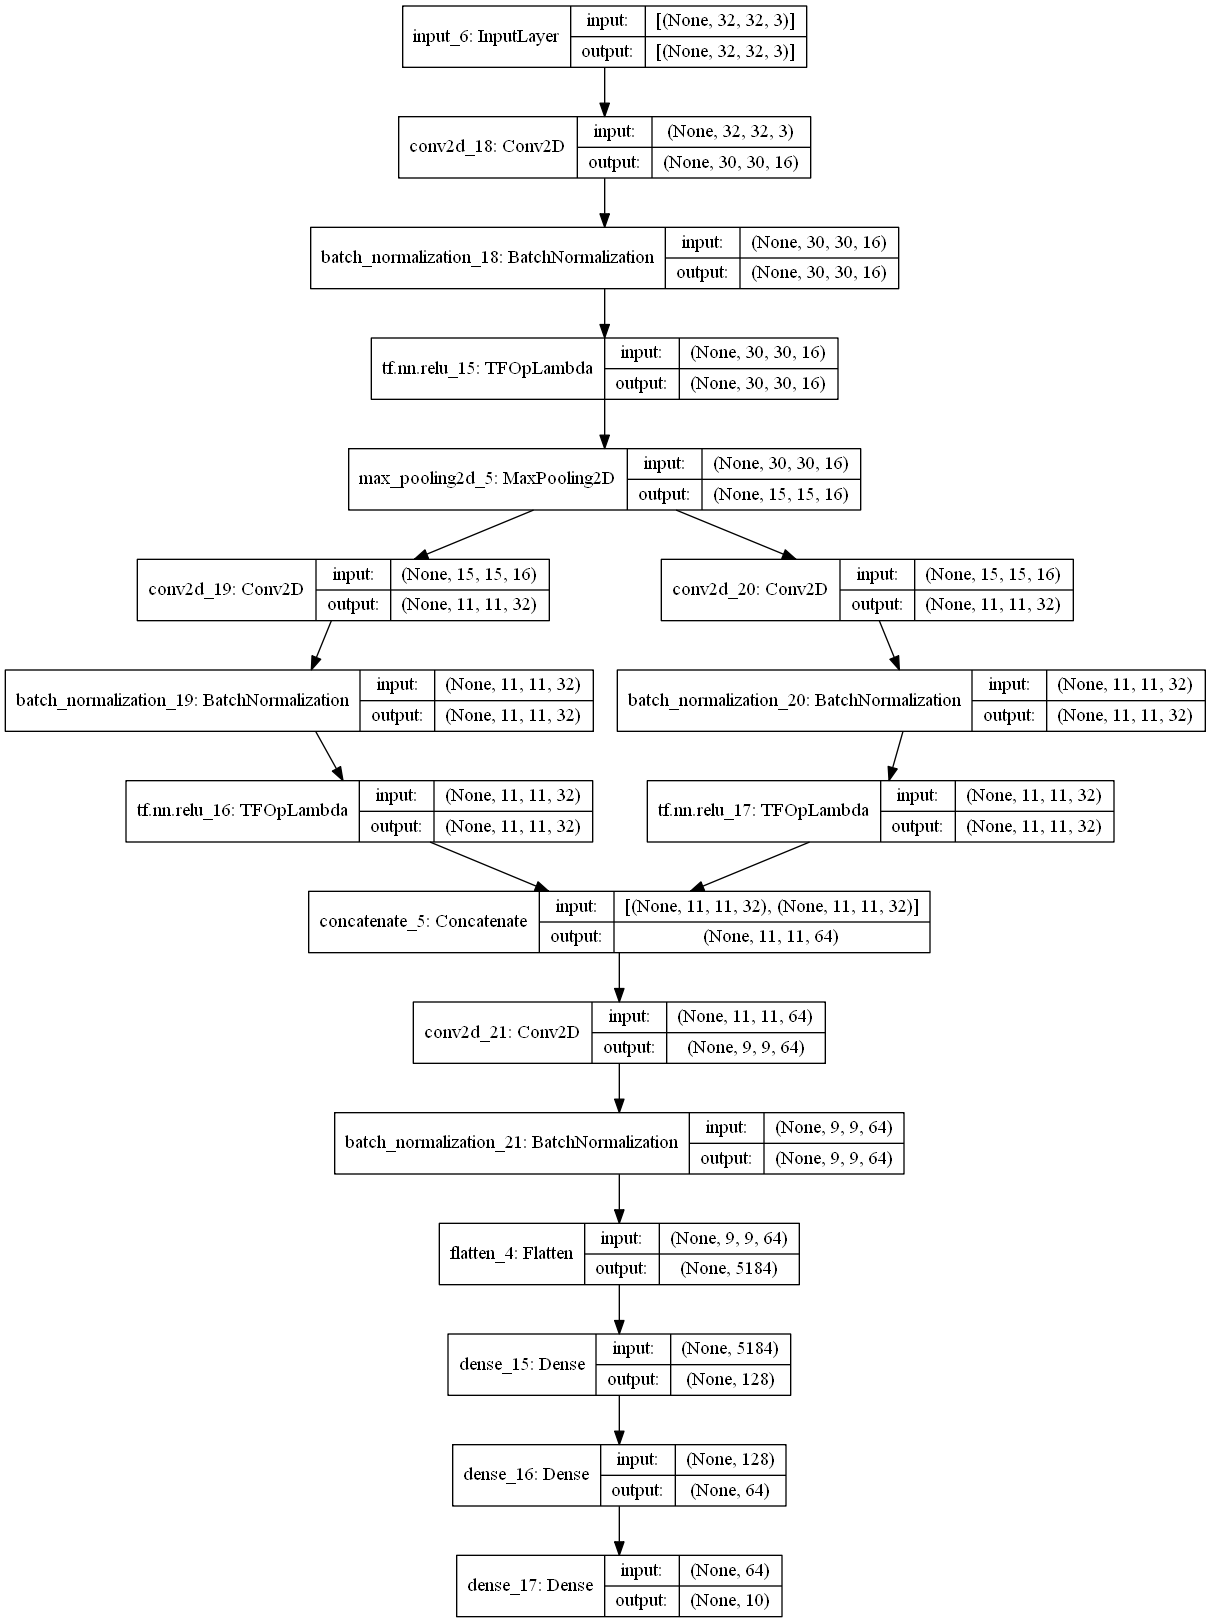

In [18]:
tf.keras.utils.plot_model(cnn_model_test_0, show_shapes=True)

In [19]:
mobile_net = tf.keras.applications.mobilenet.MobileNet()

17227776/17225924 [==============================] - 2s 0us/step


In [21]:
len(mobile_net.layers)

92

In [22]:
len(cnn_model_test_0.layers)

18

In [31]:
cnn_model_test_input_1 = tf.keras.layers.Input(shape = (32, 32, 3))

layer1 = tf.keras.layers.Conv2D(32, (3, 3), kernel_regularizer = tf.keras.regularizers.l2())(cnn_model_test_input_1)
layer1 = tf.keras.layers.BatchNormalization()(layer1)
layer1 = tf.keras.activations.relu(layer1)
layer1 = tf.keras.layers.MaxPool2D()(layer1)

layer2 = tf.keras.layers.Conv2D(32, (3, 3), kernel_regularizer = tf.keras.regularizers.l2())(cnn_model_test_input_1)
layer2 = tf.keras.layers.BatchNormalization()(layer2)
layer2 = tf.keras.activations.relu(layer2)
layer2 = tf.keras.layers.MaxPool2D()(layer2)

layer_c = tf.keras.layers.concatenate([layer1, layer2])
layer_c = tf.keras.layers.MaxPool2D()(layer_c)

layer3 = tf.keras.layers.Conv2D(64, (5,5), kernel_regularizer = tf.keras.regularizers.l2())(layer_c)
layer3 = tf.keras.layers.BatchNormalization()(layer3)
layer3 = tf.keras.activations.relu(layer3)

layer4 = tf.keras.layers.Conv2D(64, (5,5), kernel_regularizer = tf.keras.regularizers.l2())(layer_c)
layer4 = tf.keras.layers.BatchNormalization()(layer4)
layer4 = tf.keras.activations.relu(layer4)

layer_c = tf.keras.layers.concatenate([layer3, layer4])

layer5 = tf.keras.layers.Conv2D(128, (3,3), kernel_regularizer = tf.keras.regularizers.l2())(layer_c)
layer5 = tf.keras.layers.BatchNormalization()(layer5)
layer5 = tf.keras.activations.relu(layer5)
layer5 = tf.keras.layers.Flatten()(layer5)

layer5 = tf.keras.layers.Dense(128, activation='relu',
                              kernel_regularizer = tf.keras.regularizers.l2())(layer5)
layer5 = tf.keras.layers.Dropout(0.3)(layer5)
layer5 = tf.keras.layers.Dense(64, activation='relu',
                              kernel_regularizer = tf.keras.regularizers.l2())(layer5)
layer5 = tf.keras.layers.Dropout(0.3)(layer5)
cnn_model_test_output_1 = tf.keras.layers.Dense(10, activation='softmax')(layer5)

cnn_model_test_1 = tf.keras.Model(inputs = cnn_model_test_input_1, outputs = cnn_model_test_output_1)

cnn_model_test_1.compile(loss = tf.keras.losses.sparse_categorical_crossentropy,
                         optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
                         metrics = tf.keras.metrics.sparse_categorical_accuracy)

cnn_model_test_1.fit(x=x_cifar_train, y=y_cifar_train, 
                     validation_data = (x_cifar_val, y_cifar_val),
                     batch_size = 64, epochs = 50)

Epoch 1/50
625/625 [==============================] - 12s 16ms/step - loss: 2.8128 - sparse_categorical_accuracy: 0.4446 - val_loss: 2.5221 - val_sparse_categorical_accuracy: 0.2814
Epoch 2/50
625/625 [==============================] - 9s 15ms/step - loss: 1.7220 - sparse_categorical_accuracy: 0.5346 - val_loss: 2.3744 - val_sparse_categorical_accuracy: 0.3207
Epoch 3/50
625/625 [==============================] - 9s 14ms/step - loss: 1.6497 - sparse_categorical_accuracy: 0.5581 - val_loss: 1.8457 - val_sparse_categorical_accuracy: 0.4643
Epoch 4/50
625/625 [==============================] - 9s 14ms/step - loss: 1.5920 - sparse_categorical_accuracy: 0.5757 - val_loss: 2.4269 - val_sparse_categorical_accuracy: 0.3467
Epoch 5/50
625/625 [==============================] - 9s 14ms/step - loss: 1.5430 - sparse_categorical_accuracy: 0.5958 - val_loss: 1.7706 - val_sparse_categorical_accuracy: 0.5068
Epoch 6/50
625/625 [==============================] - 9s 14ms/step - loss: 1.5039 - sparse_cat

625/625 [==============================] - 9s 14ms/step - loss: 1.2252 - sparse_categorical_accuracy: 0.6903 - val_loss: 1.4354 - val_sparse_categorical_accuracy: 0.5994
Epoch 47/50
625/625 [==============================] - 9s 14ms/step - loss: 1.2223 - sparse_categorical_accuracy: 0.6883 - val_loss: 2.6832 - val_sparse_categorical_accuracy: 0.4128
Epoch 48/50
625/625 [==============================] - 9s 15ms/step - loss: 1.2208 - sparse_categorical_accuracy: 0.6884 - val_loss: 1.4300 - val_sparse_categorical_accuracy: 0.6013
Epoch 49/50
625/625 [==============================] - 9s 14ms/step - loss: 1.2135 - sparse_categorical_accuracy: 0.6889 - val_loss: 1.4837 - val_sparse_categorical_accuracy: 0.5867
Epoch 50/50
625/625 [==============================] - 9s 14ms/step - loss: 1.2137 - sparse_categorical_accuracy: 0.6907 - val_loss: 1.5992 - val_sparse_categorical_accuracy: 0.5624


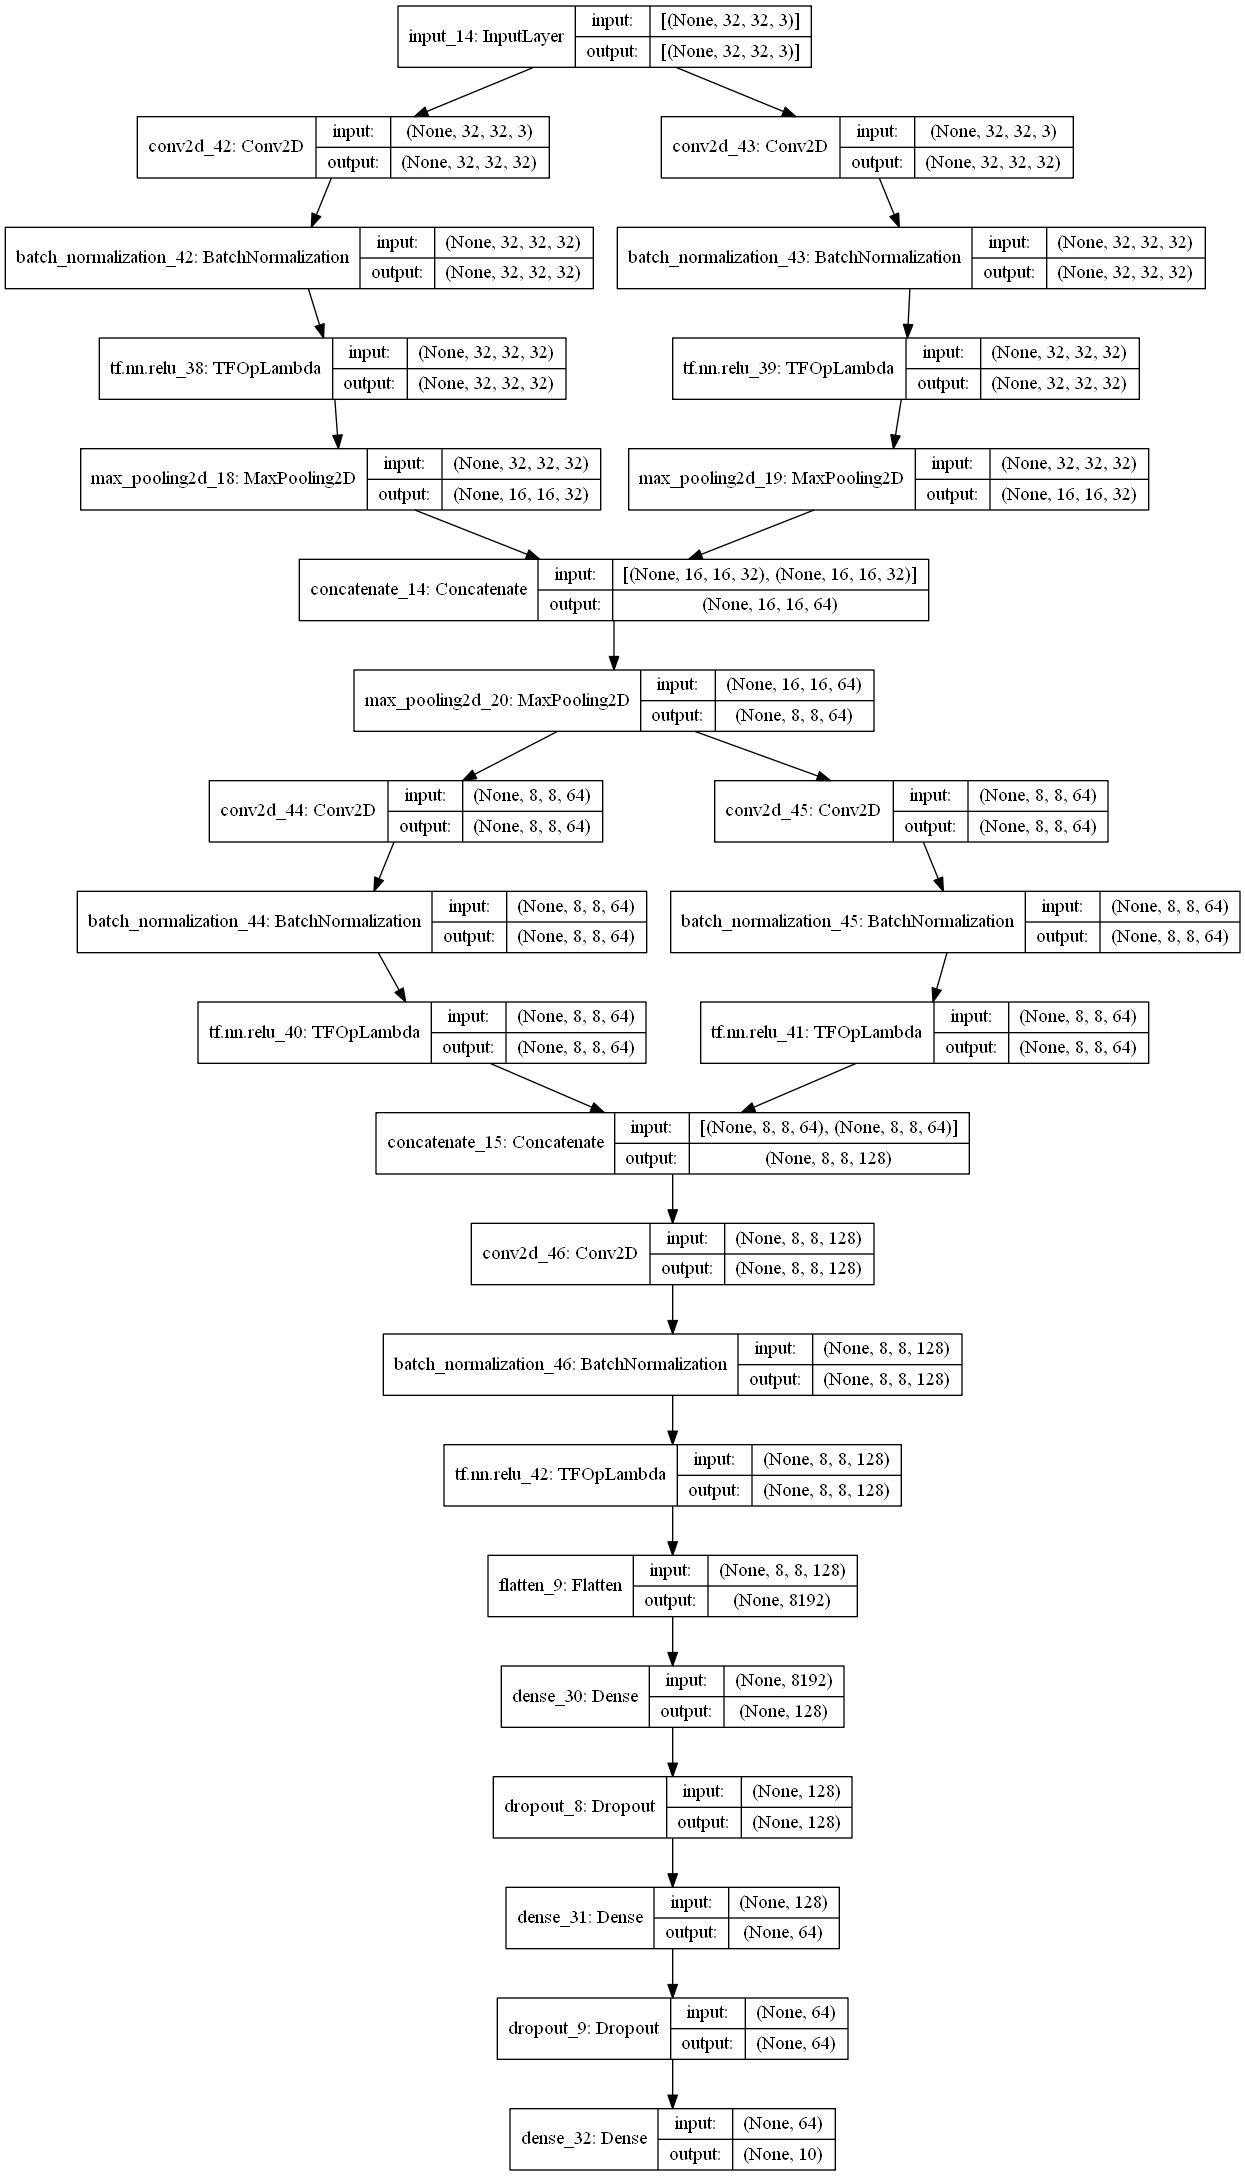

In [30]:
tf.keras.utils.plot_model(cnn_model_test_1, show_shapes=True)


In [32]:
cnn_model_test_1.evaluate(x=x_cifar_test, y=y_cifar_test, batch_size = 64)

157/157 [==============================] - 1s 6ms/step - loss: 1.6086 - sparse_categorical_accuracy: 0.5591


[1.6086201667785645, 0.5590999722480774]

In [33]:
cnn_model_test_1.fit(x=x_cifar_train, y=y_cifar_train, 
                     validation_data = (x_cifar_val, y_cifar_val),
                     batch_size = 64, epochs = 50)

Epoch 1/50
625/625 [==============================] - 9s 15ms/step - loss: 1.2166 - sparse_categorical_accuracy: 0.6898 - val_loss: 1.5513 - val_sparse_categorical_accuracy: 0.5835
Epoch 2/50
625/625 [==============================] - 9s 15ms/step - loss: 1.2192 - sparse_categorical_accuracy: 0.6902 - val_loss: 1.5546 - val_sparse_categorical_accuracy: 0.5599
Epoch 3/50
625/625 [==============================] - 9s 14ms/step - loss: 1.2251 - sparse_categorical_accuracy: 0.6869 - val_loss: 1.5500 - val_sparse_categorical_accuracy: 0.5731
Epoch 4/50
625/625 [==============================] - 9s 14ms/step - loss: 1.2154 - sparse_categorical_accuracy: 0.6911 - val_loss: 1.4151 - val_sparse_categorical_accuracy: 0.6131
Epoch 5/50
625/625 [==============================] - 9s 14ms/step - loss: 1.2166 - sparse_categorical_accuracy: 0.6913 - val_loss: 1.7845 - val_sparse_categorical_accuracy: 0.4962
Epoch 6/50
625/625 [==============================] - 9s 14ms/step - loss: 1.2103 - sparse_cate

KeyboardInterrupt: 

In [34]:
cnn_model_test_1.evaluate(x=x_cifar_test, y=y_cifar_test, batch_size = 64)

157/157 [==============================] - 1s 7ms/step - loss: 1.3637 - sparse_categorical_accuracy: 0.6330


[1.3637396097183228, 0.6330000162124634]

In [35]:
vgg16_model = tf.keras.applications.vgg16.VGG16()

553467904/553467096 [==============================] - 107s 0us/step


In [37]:
len(vgg16_model.layers)

23

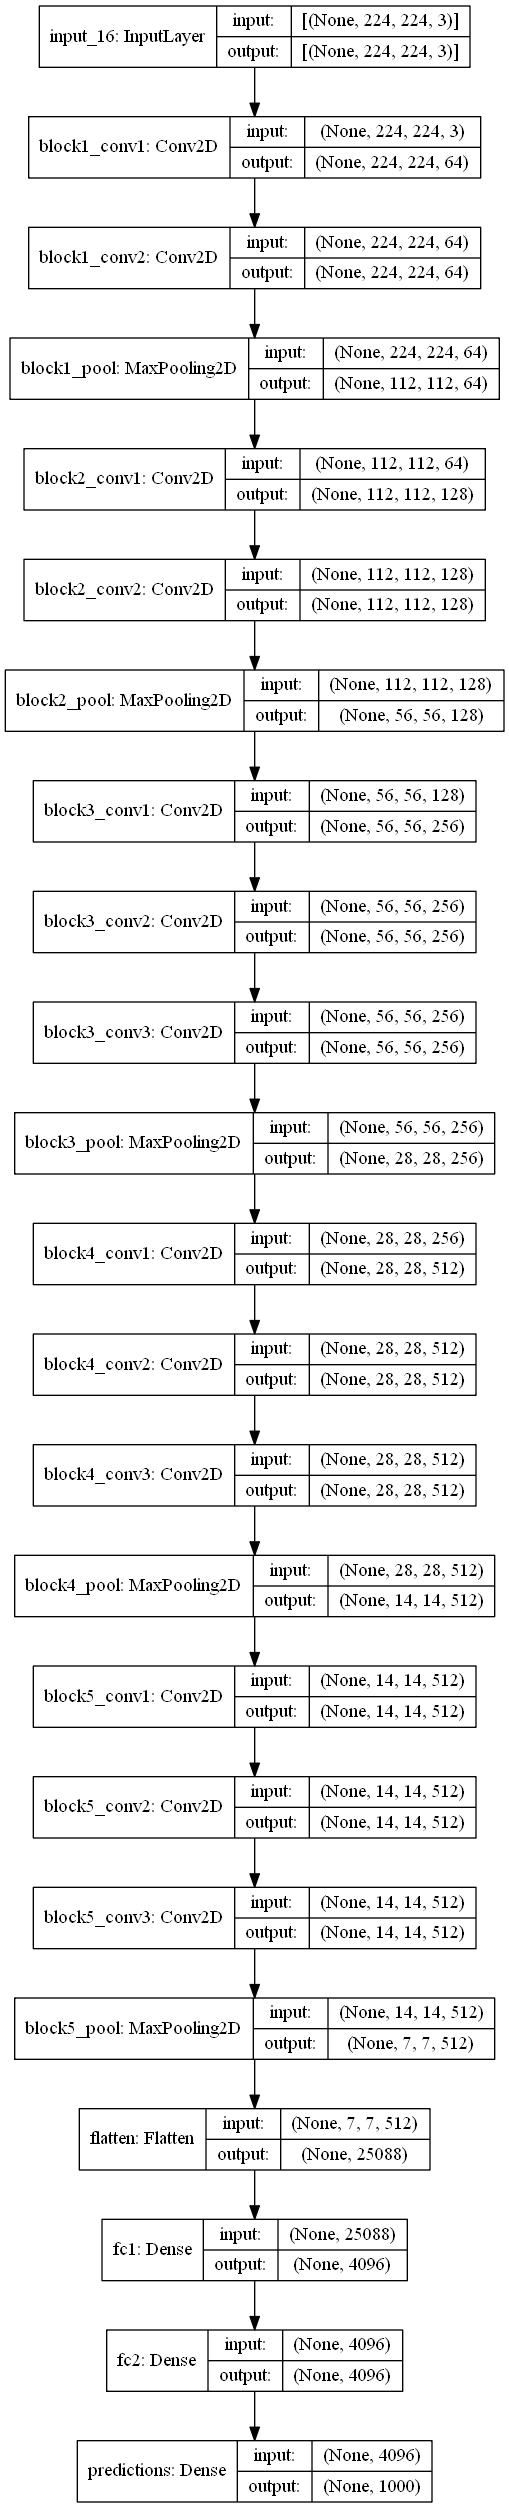

In [38]:
tf.keras.utils.plot_model(vgg16_model, show_shapes=True)

In [71]:
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_16 (InputLayer)        [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [91]:
model_copy_vgg16 = tf.keras.Sequential()

In [92]:
for layer in vgg16_model.layers[1:-1]:
    model_copy_vgg16.add(layer)

In [98]:
model_copy_vgg16.add(tf.keras.layers.Dense(10, activation='softmax'))

In [99]:
model_copy_vgg16.compile(loss = tf.keras.losses.sparse_categorical_crossentropy,
                         optimizer = tf.keras.optimizers.Adam(),
                         metrics = tf.keras.metrics.sparse_categorical_accuracy)

model_copy_vgg16.fit(x=x_cifar_train, y=y_cifar_train, validation_data = (x_cifar_val, y_cifar_val),
                    epochs = 5, batch_size = 64)

Epoch 1/5


ValueError: in user code:

    C:\Users\An_asus\Anaconda3\envs\tf\lib\site-packages\tensorflow\python\keras\engine\training.py:855 train_function  *
        return step_function(self, iterator)
    C:\Users\An_asus\Anaconda3\envs\tf\lib\site-packages\tensorflow\python\keras\engine\training.py:845 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\An_asus\Anaconda3\envs\tf\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1285 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\An_asus\Anaconda3\envs\tf\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2833 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\An_asus\Anaconda3\envs\tf\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3608 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\An_asus\Anaconda3\envs\tf\lib\site-packages\tensorflow\python\keras\engine\training.py:838 run_step  **
        outputs = model.train_step(data)
    C:\Users\An_asus\Anaconda3\envs\tf\lib\site-packages\tensorflow\python\keras\engine\training.py:795 train_step
        y_pred = self(x, training=True)
    C:\Users\An_asus\Anaconda3\envs\tf\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:1030 __call__
        outputs = call_fn(inputs, *args, **kwargs)
    C:\Users\An_asus\Anaconda3\envs\tf\lib\site-packages\tensorflow\python\keras\engine\sequential.py:394 call
        outputs = layer(inputs, **kwargs)
    C:\Users\An_asus\Anaconda3\envs\tf\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:1013 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    C:\Users\An_asus\Anaconda3\envs\tf\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:251 assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer fc1 is incompatible with the layer: expected axis -1 of input shape to have value 25088 but received input with shape (64, 512)


In [100]:
model_copy_vgg16.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        multiple                  1792      
_________________________________________________________________
block1_conv2 (Conv2D)        multiple                  36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   multiple                  0         
_________________________________________________________________
block2_conv1 (Conv2D)        multiple                  73856     
_________________________________________________________________
block2_conv2 (Conv2D)        multiple                  147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   multiple                  0         
_________________________________________________________________
block3_conv1 (Conv2D)        multiple                 

In [7]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [8]:
x_train.shape

(50000, 32, 32, 3)

In [9]:
x_test.shape

(10000, 32, 32, 3)

In [10]:
x_train, x_test = x_train/ 255.0, x_test / 255.0

In [30]:
model_input = tf.keras.layers.Input(shape=(32, 32, 3))
x = tf.keras.layers.Conv2D(32, (3, 3))(model_input)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.activations.relu(x)
x = tf.keras.layers.MaxPool2D()(x)

x = tf.keras.layers.Conv2D(64, (5, 5))(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.activations.relu(x)

x = tf.keras.layers.Conv2D(128, (3, 3))(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.activations.relu(x)

x = tf.keras.layers.Flatten()(x)
model_output = tf.keras.layers.Dense(3072, activation='sigmoid')(x)

cnn_model = tf.keras.Model(inputs = model_input, outputs = model_output)
cnn_model.summary()

Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
batch_normalization_27 (Batc (None, 30, 30, 32)        128       
_________________________________________________________________
tf.nn.relu_27 (TFOpLambda)   (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 11, 11, 64)        51264     
_________________________________________________________________
batch_normalization_28 (Batc (None, 11, 11, 64)        256 

In [11]:
x_train_output = tf.reshape(x_train, (-1, 32*32*3))
x_train_output.shape

TensorShape([50000, 3072])

In [12]:
x_test_output = tf.reshape(x_test, (-1, 32*32*3))
x_test_output.shape

TensorShape([10000, 3072])

In [31]:
cnn_model.compile(loss = tf.keras.losses.mse,
                  optimizer = tf.keras.optimizers.Adam(),
                  metrics = ['accuracy'])

cnn_model.fit(x=x_train, y=x_train_output, batch_size=64, epochs=5)

Epoch 1/5
782/782 [==============================] - 28s 25ms/step - loss: 0.0115 - accuracy: 0.0254
Epoch 2/5
782/782 [==============================] - 20s 25ms/step - loss: 0.0051 - accuracy: 0.0545
Epoch 3/5
782/782 [==============================] - 20s 25ms/step - loss: 0.0039 - accuracy: 0.0703
Epoch 4/5
782/782 [==============================] - 20s 25ms/step - loss: 0.0033 - accuracy: 0.0839
Epoch 5/5
782/782 [==============================] - 20s 25ms/step - loss: 0.0031 - accuracy: 0.0914


In [35]:
cnn_model.evaluate(x=x_test, y=x_test_output, batch_size=32)

313/313 [==============================] - 2s 5ms/step - loss: 0.0028 - accuracy: 0.0907


[0.0028495320584625006, 0.09070000052452087]

In [41]:
cnn_model.save('test.h5')

In [4]:
loaded_cnn_model = tf.keras.models.load_model('test.h5')
loaded_cnn_model.summary()

Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
batch_normalization_27 (Batc (None, 30, 30, 32)        128       
_________________________________________________________________
tf.nn.relu_27 (TFOpLambda)   (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 11, 11, 64)        51264     
_________________________________________________________________
batch_normalization_28 (Batc (None, 11, 11, 64)        256 

In [13]:
loaded_cnn_model.evaluate(x=x_test, y=x_test_output, batch_size=32)

313/313 [==============================] - 4s 6ms/step - loss: 0.0028 - accuracy: 0.0907


[0.0028495320584625006, 0.09070000052452087]

In [19]:
model = tf.keras.Sequential()

In [20]:
for layer in loaded_cnn_model.layers[:-1]:
    model.add(layer)

In [21]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_27 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
batch_normalization_27 (Batc (None, 30, 30, 32)        128       
_________________________________________________________________
tf.nn.relu_27 (TFOpLambda)   (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 11, 11, 64)        51264     
_________________________________________________________________
batch_normalization_28 (Batc (None, 11, 11, 64)        256       
_________________________________________________________________
tf.nn.relu_28 (TFOpLambda)   (None, 11, 11, 64)       

In [22]:
for layer in model.layers:
    layer.trainable = False

In [34]:
for layer in model.layers:
    print(layer.trainable)

False
False
False
False
False
False
False
False
False
False
False
True


In [37]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_27 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
batch_normalization_27 (Batc (None, 30, 30, 32)        128       
_________________________________________________________________
tf.nn.relu_27 (TFOpLambda)   (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 11, 11, 64)        51264     
_________________________________________________________________
batch_normalization_28 (Batc (None, 11, 11, 64)        256       
_________________________________________________________________
tf.nn.relu_28 (TFOpLambda)   (None, 11, 11, 64)       

In [33]:
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [41]:
loaded_cnn_model.compile(loss = tf.keras.losses.sparse_categorical_crossentropy,
                  optimizer = tf.keras.optimizers.Adam(),
                  metrics = ['accuracy'])

loaded_cnn_model.fit(x=x_train, y=y_train, batch_size=32, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 25s 16ms/step - loss: 0.9702 - accuracy: 0.6682
Epoch 2/5
1563/1563 [==============================] - 25s 16ms/step - loss: 0.9182 - accuracy: 0.6883
Epoch 3/5
1563/1563 [==============================] - 25s 16ms/step - loss: 0.8763 - accuracy: 0.7033
Epoch 4/5
1563/1563 [==============================] - 25s 16ms/step - loss: 0.8420 - accuracy: 0.7143
Epoch 5/5
1563/1563 [==============================] - 25s 16ms/step - loss: 0.8107 - accuracy: 0.7266


In [42]:
loaded_cnn_model.evaluate(x=x_test, y=y_test, batch_size=32)

313/313 [==============================] - 2s 5ms/step - loss: 1.4839 - accuracy: 0.5357


[1.483875036239624, 0.5357000231742859]

In [39]:
tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [40]:
loaded_cnn_model.evaluate(x=x_test, y=y_test, batch_size=32)

313/313 [==============================] - 2s 6ms/step - loss: 1.3590 - accuracy: 0.5373


[1.3590312004089355, 0.5372999906539917]